## data preparation

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices())

2023-11-30 19:08:29.407616: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-30 19:08:29.430279: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 19:08:29.430296: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 19:08:29.430311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 19:08:29.434996: I tensorflow/core/platform/cpu_feature_g

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-11-30 19:08:30.498057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 19:08:30.510304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 19:08:30.510552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
POINTS_NUM = 10
CLASSES_NUM = 2

import numpy as np
points = np.load(f'/host/dissertation/proccessed_data/points_{POINTS_NUM}.npy')
q = np.load('/host/dissertation/proccessed_data/q.npy')
q[q == -1] = 0
q_labels = tf.one_hot(q, CLASSES_NUM)

2023-11-30 19:08:30.533733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 19:08:30.534205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 19:08:30.534507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
import sys
ABS_ROOT_DIR_PATH = '/host/dissertation/'
if ABS_ROOT_DIR_PATH not in sys.path:
    sys.path.append(ABS_ROOT_DIR_PATH)

## manual testing

In [7]:
import cvnn.layers as complex_layers

model = tf.keras.models.Sequential()
model.add(complex_layers.ComplexInput(input_shape=(POINTS_NUM,)))
model.add(complex_layers.ComplexDense(units=16, activation='pol_sigmoid'))
model.add(complex_layers.ComplexDense(units=16, activation='pol_sigmoid'))
model.add(complex_layers.ComplexDense(units=CLASSES_NUM, activation='softmax_real_with_abs'))
model.compile(optimizer=tf.keras.optimizers.SGD(clipnorm=1.), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense (ComplexDens  (None, 16)                352       
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 16)                544       
 nse)                                                            
                                                                 
 complex_dense_2 (ComplexDe  (None, 2)                 68        
 nse)                                                            
                                                                 
Total params: 964 (3.77 KB)
Trainable params: 964 (3.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from common.model import FreeMemory
history = model.fit(points, q_labels, epochs=600, validation_split=0.2, verbose=0, callbacks=[FreeMemory(25)])

epoch 0 ended, info: {'loss': 0.7099388241767883, 'accuracy': 0.5394032001495361, 'val_loss': 0.6958940029144287, 'val_accuracy': 0.5593635439872742}
epoch 25 ended, info: {'loss': 0.608819305896759, 'accuracy': 0.7977046966552734, 'val_loss': 0.5993465185165405, 'val_accuracy': 0.8053855299949646}
epoch 50 ended, info: {'loss': 0.5535834431648254, 'accuracy': 0.8644223213195801, 'val_loss': 0.5353251099586487, 'val_accuracy': 0.9088127017021179}
epoch 75 ended, info: {'loss': 0.5152872800827026, 'accuracy': 0.905279278755188, 'val_loss': 0.5227011442184448, 'val_accuracy': 0.883108913898468}
epoch 100 ended, info: {'loss': 0.49042370915412903, 'accuracy': 0.9323641657829285, 'val_loss': 0.5046703219413757, 'val_accuracy': 0.902080774307251}
epoch 125 ended, info: {'loss': 0.47511622309684753, 'accuracy': 0.9364957809448242, 'val_loss': 0.510825514793396, 'val_accuracy': 0.9179926514625549}
epoch 150 ended, info: {'loss': 0.4640921950340271, 'accuracy': 0.9484315514564514, 'val_loss': 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from common.utils import make_dataframe, moving_average, validation_set, train_set

def plot_metric_history_zoomed(fit_history, metric = 'loss', mode = 'min', max = 1, min = 0, moving_average_window = (10,), threshold_multiplier = 10, subplots=3, legend_loc = 'lower left', title = None, dpi=100):

    if isinstance(fit_history, pd.core.frame.DataFrame):
        df = fit_history
    else:
        df = make_dataframe(fit_history)

    if mode == 'min':
        train_1st_percentile = np.percentile(df[metric].values, 1)
        val_1st_percentile = np.percentile(df[f'val_{metric}'].values, 1)
        print(f'1st percentile of train {metric}:       {train_1st_percentile:.4e}')
        print(f'1st percentile of validation {metric}:  {val_1st_percentile:.4e}')
        threshold = np.maximum(train_1st_percentile, val_1st_percentile)
    else:
        train_99th_percentile = np.percentile(df[metric].values, 99)
        val_99th_percentile = np.percentile(df[f'val_{metric}'].values, 99)
        print(f'99th percentile of train {metric}:       {train_99th_percentile:.4e}')
        print(f'99th percentile of validation {metric}:  {val_99th_percentile:.4e}')
        threshold = np.minimum(train_99th_percentile, val_99th_percentile)
    
    if subplots < 3:
        fig, axes = plt.subplots(2, sharex=True, figsize=(8,6),  gridspec_kw={'height_ratios': [1, 2]}, constrained_layout=True)
    else:
        fig, axes = plt.subplots(subplots, sharex=True, figsize=(8,6), constrained_layout=True)
    fig.set_dpi(dpi)
    if title is not None:
        # axes[0].set_title(f'{metric} history')
    # else:
        axes[0].set_title(title)
        
    for axis in axes:
        # axis.grid(axis='x', linestyle='--', linewidth=0.5)
        axis.plot(df['epoch'], df[metric], label='training set')
        axis.plot(df['epoch'], df[f'val_{metric}'], linestyle='dotted', linewidth=0.5, label='validation set')
        if moving_average_window is not None:
            for w in moving_average_window:
                axis.plot(df['epoch'][w-1:], moving_average(df[f'val_{metric}'], w), linestyle=(0, (1, 1)), label=f'validation set - moving average, $w={w}$')
        if mode == 'min':
            axis.set_ylim((min, threshold_multiplier*threshold))
            threshold_multiplier /= 2
        else:
            axis.set_ylim((threshold_multiplier*threshold, max))
            threshold_multiplier /= 1.2
    if legend_loc:
        axes[-1].legend(loc=legend_loc)
    axes[-1].set_xlabel("epoch no.")
    fig.supylabel(f"{metric} value")

99th percentile of train accuracy:       9.7598e-01
99th percentile of validation accuracy:  9.9205e-01


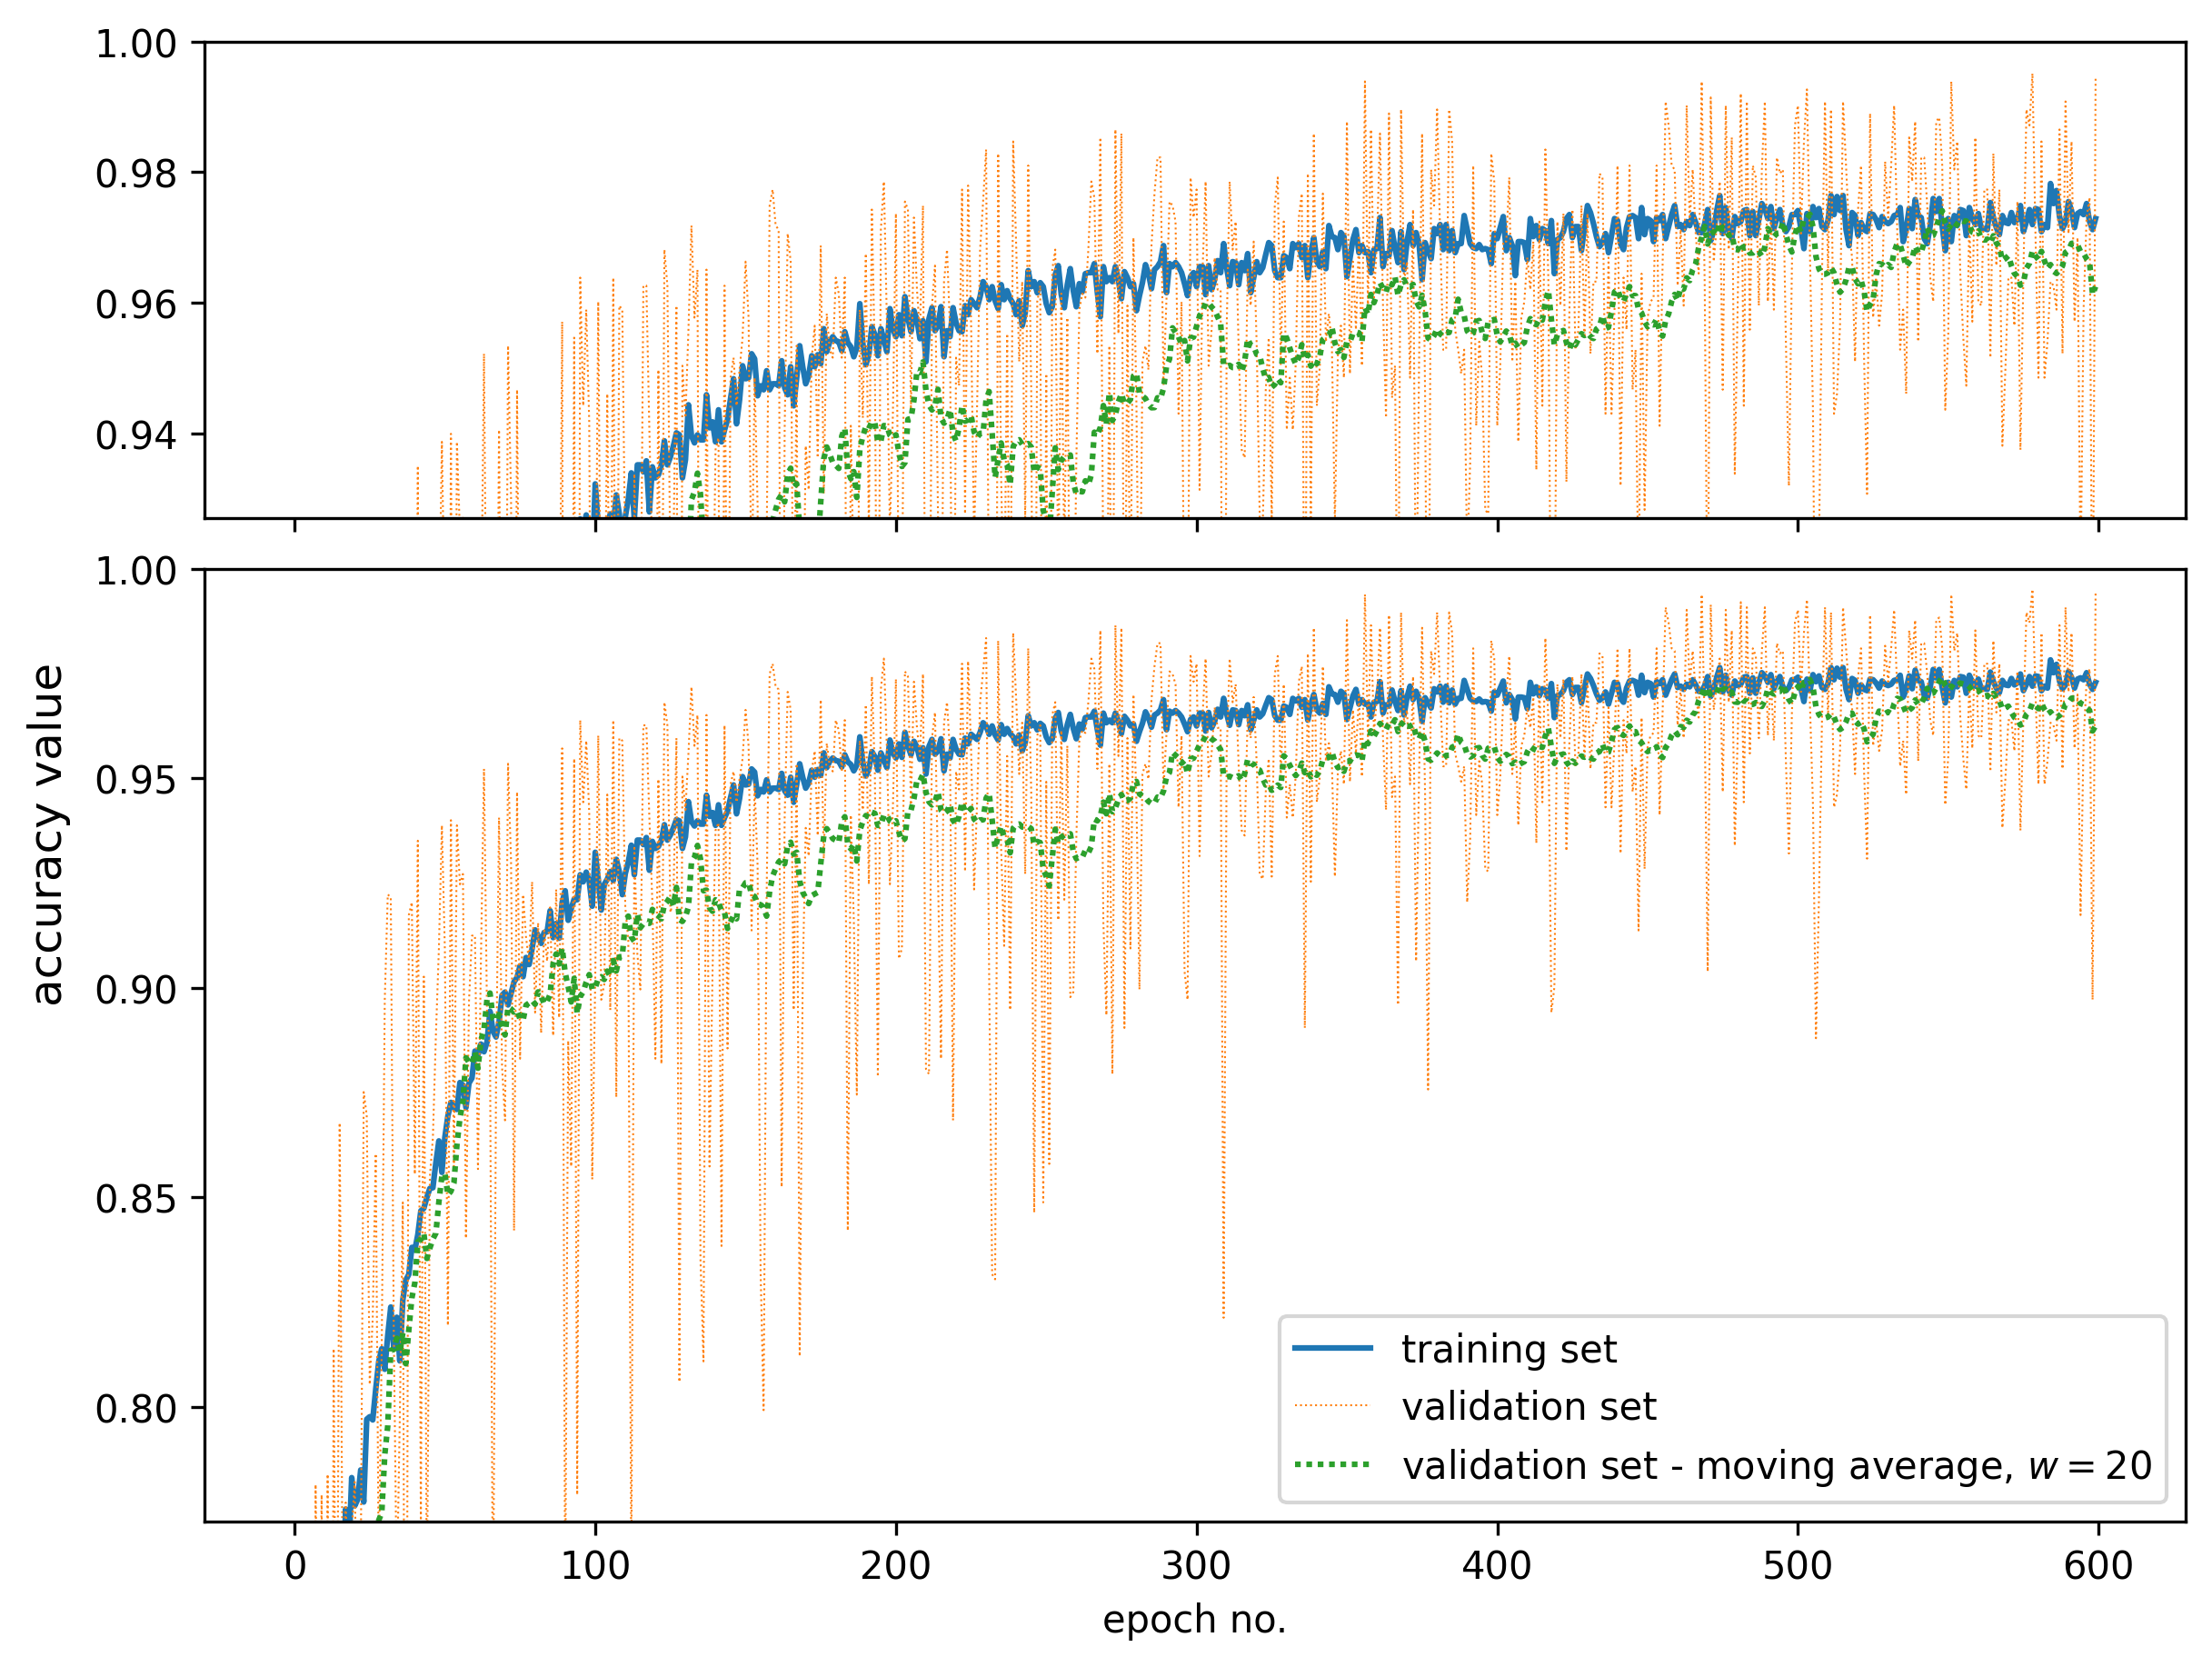

In [38]:
from common.plot import plot_metric_history_zoomed
plot_metric_history_zoomed(history, metric='accuracy', mode='max', moving_average_window=(20,), threshold_multiplier=0.95, 
                           dpi=300, legend_loc = 'lower right', subplots=2)

In [13]:
from common.utils import make_dataframe
df = make_dataframe(history)
df.sort_values('val_accuracy', ascending=False)

,epoch,loss,accuracy,val_loss,val_accuracy
578,578,0.403213,0.971997,0.395688,0.995104
599,599,0.403218,0.972915,0.389850,0.994492
551,551,0.404416,0.969396,0.390911,0.993880
468,468,0.405229,0.970773,0.389603,0.993880
356,356,0.419731,0.967712,0.410352,0.993880
...,...,...,...,...,...
4,4,0.683533,0.665953,0.692040,0.582007
12,12,0.649153,0.742923,0.696530,0.561812
0,0,0.709939,0.539403,0.695894,0.559364
6,6,0.674640,0.698546,0.691197,0.550796


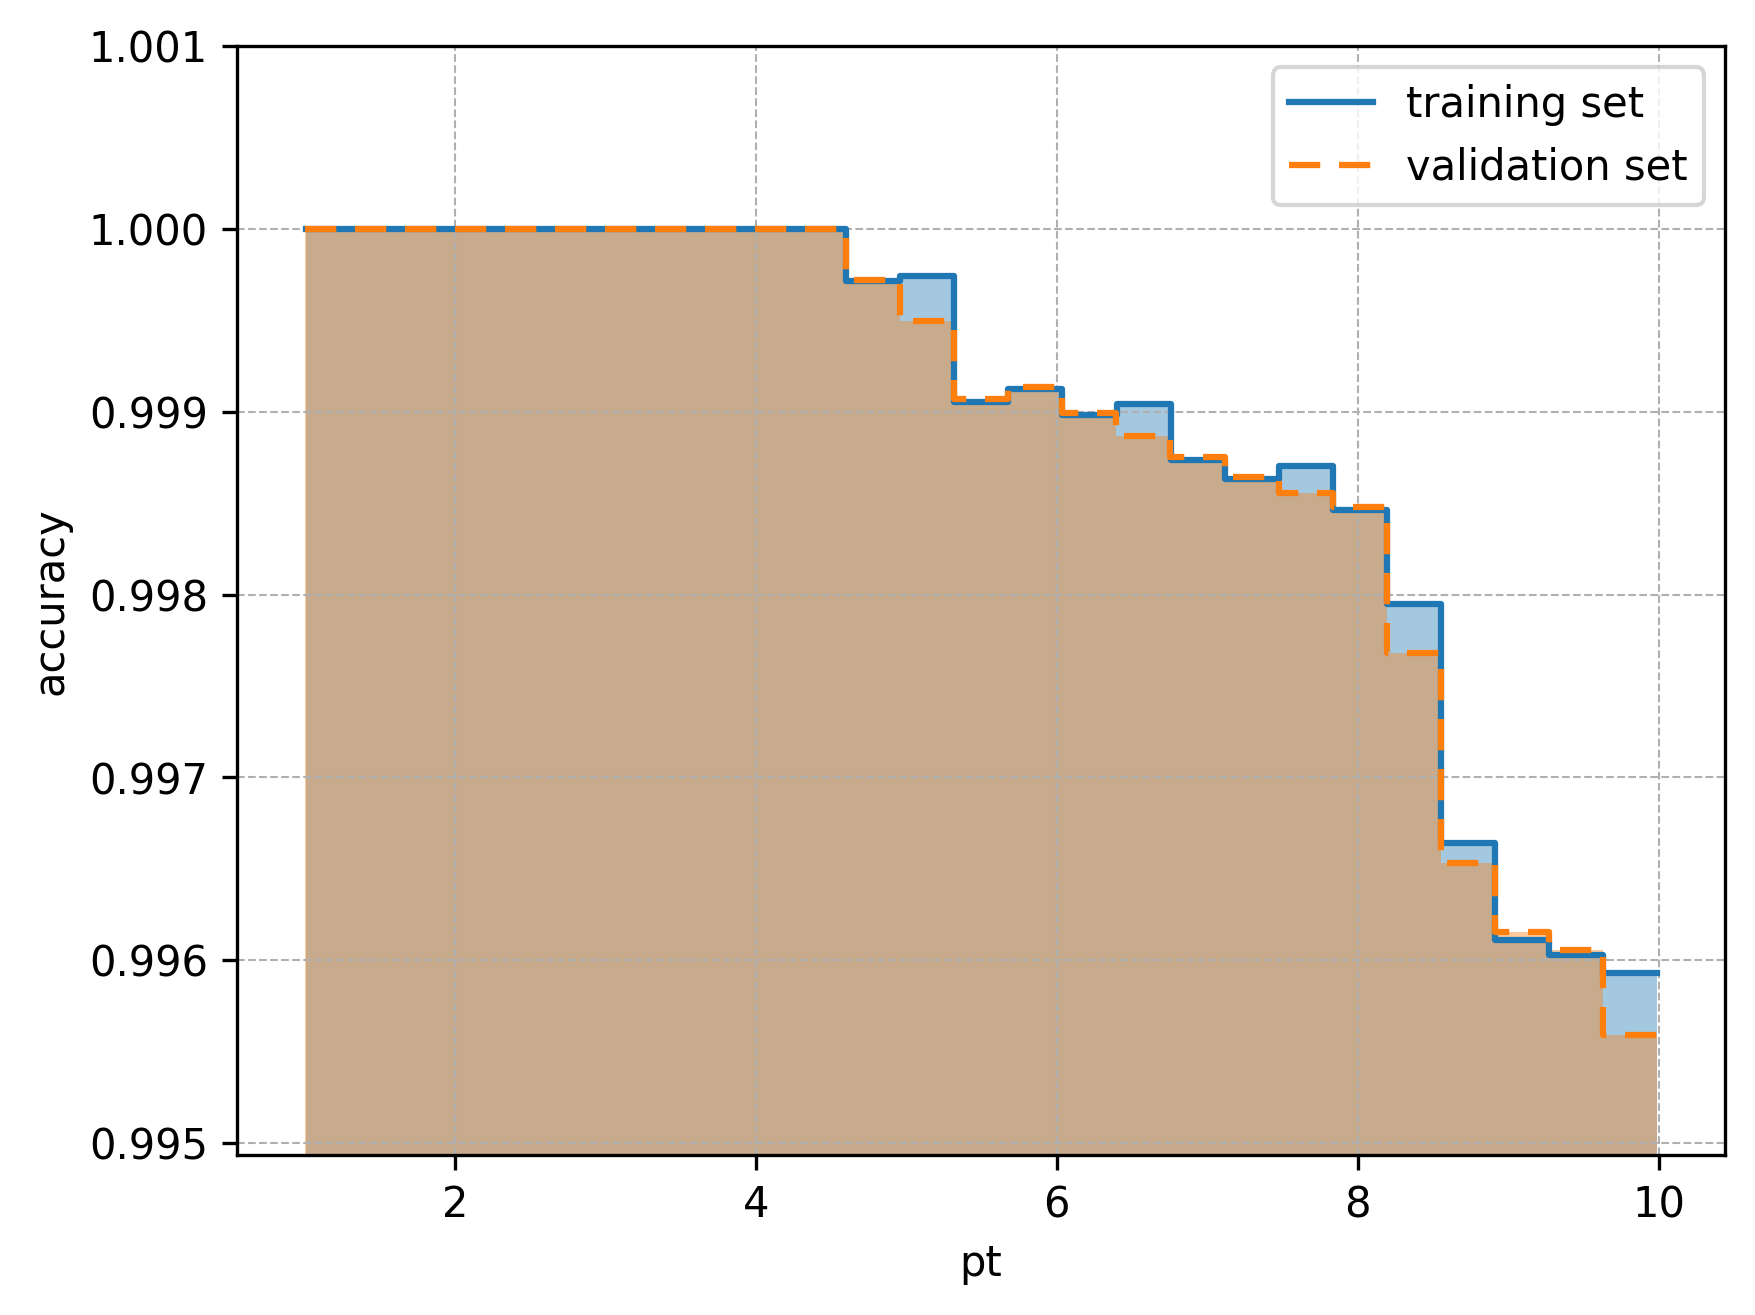

In [36]:
from common.utils import validation_set, train_set
from common.plot import plot_steps_by_parameter

pt = np.load('/host/dissertation/proccessed_data/pt.npy')
plot_steps_by_parameter(model=model, x_data=points, y_data=q_labels, parameter=pt, 
                        metric_func=tf.keras.metrics.BinaryAccuracy(),
                        metric_label='accuracy', parameter_label='pt',
                        dpi=300)

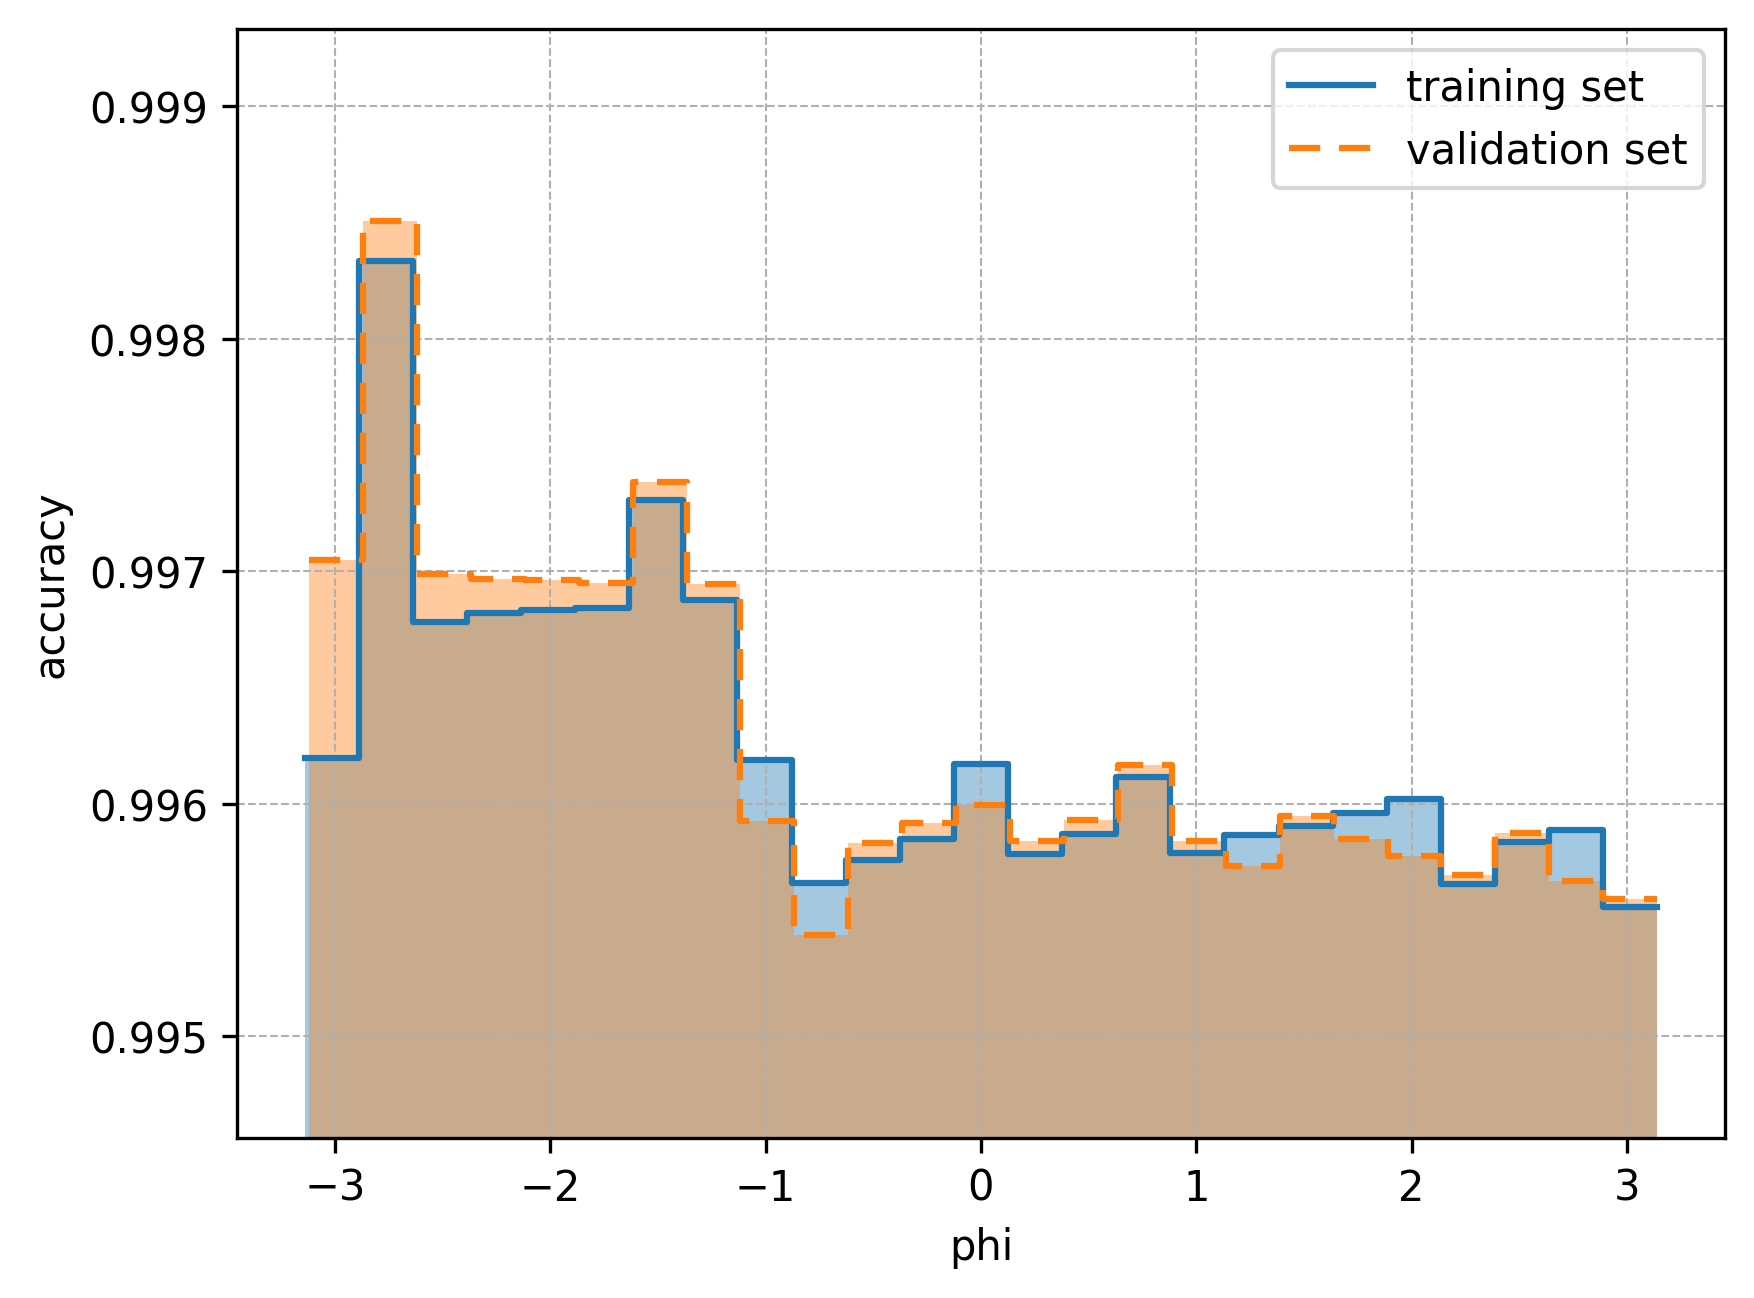

In [15]:
from common.utils import validation_set, train_set
from common.plot import plot_steps_by_parameter

phi = np.load('/host/dissertation/proccessed_data/phi.npy')
plot_steps_by_parameter(model=model, x_data=points, y_data=q_labels, parameter=phi, 
                        metric_func=tf.keras.metrics.BinaryAccuracy(),
                        metric_label='accuracy', parameter_label='phi',
                        dpi=300)

## space search

In [41]:
from common.search import ConfigsTester

configs_tester = ConfigsTester(spacepoints_number_space = [10,3],
                            hiddenlayers_number_space = [3,2,1],
                            hiddenlayers_neurons_number_space = [16,32,64],
                            hiddenlayers_activation_func_space = ['pol_sigmoid','pol_tanh','cart_relu','cart_sigmoid', 'cart_sigmoid', 'cart_sigmoid'],
                            outputlayer_activation_func_space = ['softmax_real_with_abs' , 'softmax_real_with_avg', 'softmax_real_with_mult', 'softmax_real_with_polar'],
                            metric = 'accuracy',
                            save_path = '/host/dissertation/trained_models/q/')

In [42]:
from common.model import FreeMemory

configs_tester.test_configs(y_data=q_labels,
                            optimizer_factory=lambda: tf.keras.optimizers.SGD(clipnorm=1.), 
                            loss='binary_crossentropy', 
                            epochs=150, 
                            scenario='150 epochs, 3_ and 10_points',
                            callbacks=[FreeMemory()])

START (10, 3, 16, 'pol_sigmoid', 'softmax_real_with_abs')
      model compiled
      training...
